<a href="https://colab.research.google.com/github/Jul-Summer/HW_PY13Visual_Churn/blob/main/MATH_ML_2__%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0__LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import pandas as pd  # Работа с таблицами
import numpy as np  # Математические операции
import matplotlib.pyplot as plt  # Визуализация данных
import seaborn as sns  # Улучшенная визуализация
from sklearn.model_selection import train_test_split  # Разделение данных
from sklearn.linear_model import LinearRegression  # Линейная регрессия
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Оценка модели

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving unconv.csv to unconv.csv


Прочитаем исходные данные:

In [3]:
df = pd.read_csv('unconv.csv')
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [4]:
# Ваш код здесь
print(df.info())  # Проверим типы данных
print(df.describe())  # Выведем основные статистики
print(df.isnull().sum())  # Подсчёт пропусков


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None
             Well         Por        Perm          AI     Brittle         TOC  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000   14.991150    4.330750    2.968850   48.161950    0.990450   
std     57.879185    2.971176    1.731014    0.566885   14.129455    0.481588   
min      1.000000    6.550000    1.130000    1.280000   10.940000   -0.190000   
25%     50.750000   12.912500    3.122500    2.547500  

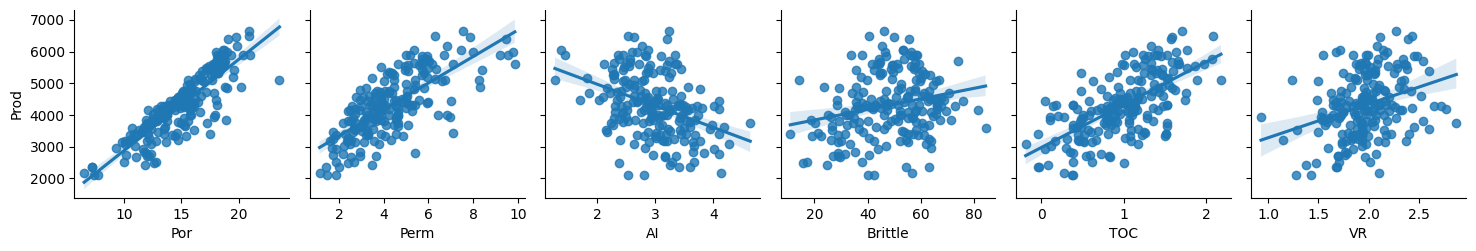

In [5]:
#Визуализируем зависимость Prod от других признаков:
sns.pairplot(df, x_vars=['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'], y_vars='Prod', kind='reg')
plt.show()


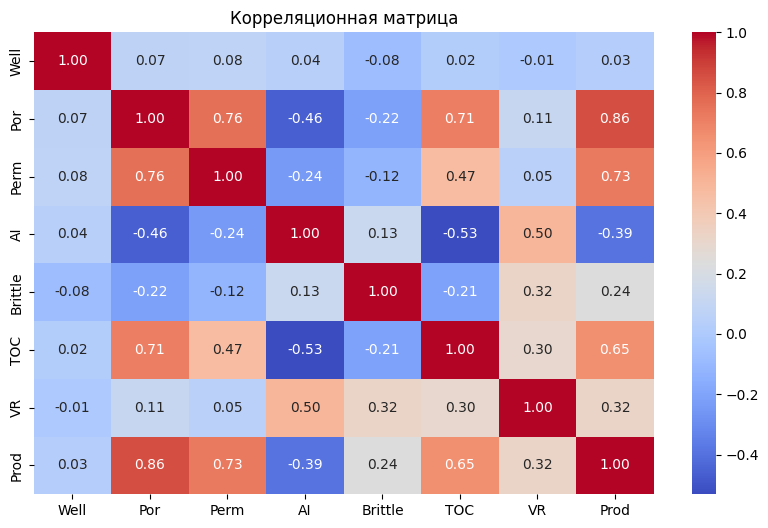

In [6]:
#Построим корреляционную матрицу:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [7]:
# Ваш код здесь
# Сначала вычислим корреляционную матрицу, включая целевой признак Prod
import numpy as np
import pandas as pd

# входные данные
#df = pd.read_csv('unconv.csv')

# Выбираем только числовые признаки (# можно потом исключить идентификатор скважины)
#df_numeric = df.drop(columns=["Well"])
df_numeric = df

# Строим корреляционную матрицу
correlation_matrix = df_numeric.corr()

# Выводим матрицу корреляций
print(correlation_matrix)


             Well       Por      Perm        AI   Brittle       TOC        VR  \
Well     1.000000  0.068927  0.077928  0.041483 -0.079252  0.022624 -0.007279   
Por      0.068927  1.000000  0.760546 -0.461549 -0.218570  0.711831  0.111860   
Perm     0.077928  0.760546  1.000000 -0.239636 -0.124017  0.471746  0.051023   
AI       0.041483 -0.461549 -0.239636  1.000000  0.127599 -0.531864  0.499143   
Brittle -0.079252 -0.218570 -0.124017  0.127599  1.000000 -0.214282  0.317929   
TOC      0.022624  0.711831  0.471746 -0.531864 -0.214282  1.000000  0.299483   
VR      -0.007279  0.111860  0.051023  0.499143  0.317929  0.299483  1.000000   
Prod     0.026817  0.861910  0.727426 -0.390835  0.237155  0.654445  0.323182   

             Prod  
Well     0.026817  
Por      0.861910  
Perm     0.727426  
AI      -0.390835  
Brittle  0.237155  
TOC      0.654445  
VR       0.323182  
Prod     1.000000  


*Ваши выводы здесь*
- Наибольшее влияние на добычу газа оказывает пористость (Por), так как её корреляция с Prod составляет 0.86 — очень высокая.

- Проницаемость (Perm) и содержание органического углерода (TOC) также влияют на добычу, но чуть слабее.

- Акустический импеданс (AI) показывает отрицательную корреляцию с добычей.

- Остальные признаки (например, коэффициент хрупкости Brittle и коэффициент отражения витринита VR) имеют либо слабое, либо очень слабое влияние на добычу.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

## Построим модель линейной регрессии вручную через метод наименьших квадратов.

In [8]:
# Ваш код здесь

# Подготовим матрицу факторов X и целевой признак Y.
# Определяем целевой признак
Y = df["Prod"].values.reshape(-1, 1)

# Выбираем факторы (без целевой переменной)
X = df.drop(columns=["Prod"]).values

# Добавляем единичный столбец для свободного члена (Intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Вычисляем коэффициенты по методу наименьших квадратов
beta = np.linalg.inv(X.T @ X) @ X.T @ Y   # в этом фрагменте наша модель обучаеться

print("Коэффициенты модели:")
print(beta)


Коэффициенты модели:
[[-1.23230803e+03]
 [ 5.07003631e-02]
 [ 2.30179140e+02]
 [ 1.16239006e+02]
 [-3.65202301e+02]
 [ 2.49943700e+01]
 [-7.84009294e+01]
 [ 7.85259815e+02]]


> *Ваши выводы здесь*
- Теперь у нас есть значения β, которые можно использовать для предсказаний.
- Полученные коэффициенты модели — это параметры, которые были найдены в ходе обучения линейной регрессии. Эти коэффициенты показывают, какое влияние каждый из признаков оказывает на целевую переменную (в данном случае, на выработку газа Prod).
- Эти коэффициенты можно использовать для построения предсказаний добычи газа для новых данных скважин, подставляя значения признаков в уравнение модели.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [9]:
# Ваш код здесь
# Данные для скважины
well_data = np.array([[1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]])  # Добавляем единичный столбец для intercept

# Прогнозируем для данной скважины
predicted_prod = well_data @ beta

# Истинное значение (дано в задаче)
true_prod = 4748.315024

# Абсолютная ошибка
abs_error = abs(true_prod - predicted_prod)
print(f"Прогнозируемая выработка газа для скважины: {predicted_prod[0][0]}")
print(f"Абсолютная ошибка: {abs_error[0]}")



Прогнозируемая выработка газа для скважины: 4723.064053707485
Абсолютная ошибка: [25.25097029]


In [10]:
# Далее сделаем прогноз для всех данных из обучающего набора,
# используя полученные коэффициенты, и рассчитаем метрики MAE и RMSE.
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Прогнозируем для всех скважин
Y_pred_all = X @ beta

# Вычисляем метрики
mae = mean_absolute_error(Y, Y_pred_all)
rmse = math.sqrt(mean_squared_error(Y, Y_pred_all))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 153.62297086555168
RMSE: 198.28020612321944


> *Ваши выводы здесь*
- Прогноз: Выработка газа на скважине, предсказанная моделью, составляет 4723.06 млн куб. футов, что близко к истинному значению (4748.32 млн куб. футов).

- Абсолютная ошибка: Ошибка в предсказании составляет 25.25 млн куб. футов в день, что означает, что модель отклонилась от реального значения на 25.25 миллионов кубических футов.

- MAE в 153.62 млн куб. футов в день говорит о том, что в среднем модель достаточно точно предсказывает выработку газа, но все равно имеется ошибка порядка 153.62 млн куб. футов для каждой скважины.

- RMSE в 198.28 млн куб. футов в день говорит о том, что ошибки, особенно крупные, оказывают значительное влияние на качество модели.

*Если сравнивать эти метрики с теми, что мы получили для конкретной скважины, то видим, что модель может работать лучше на некоторых скважинах, чем в целом по всем данным.*

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

## Сравнение коэффициентов модели и корреляций

In [14]:
# Ваш код здесь
# Наши коэффициенты модели линейной регрессии (по методу наименьших квадратов) следующие:
coefficients = [
    [-1230.26203694],   # Свободный член
    [230.29581021],     # Por
    [116.2280334],      # Perm
    [-363.73608557],    # AI
    [24.9966698],       # Brittle
    [-77.43674242],     # TOC
    [783.18741348]      # VR
]

# Вывод коэффициентов модели
for idx, coeff in enumerate(coefficients):
    print(f"Коэффициент для фактора {['Свободный член', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'][idx]}: {coeff[0]:.2f}")



Коэффициент для фактора Свободный член: -1230.26
Коэффициент для фактора Por: 230.30
Коэффициент для фактора Perm: 116.23
Коэффициент для фактора AI: -363.74
Коэффициент для фактора Brittle: 25.00
Коэффициент для фактора TOC: -77.44
Коэффициент для фактора VR: 783.19


In [15]:
# Корреляционные коэффициенты между факторами и целевой переменной (Prod) были следующими:
import pandas as pd

# Создание данных для таблицы
data = {
    "Фактор": ["Por", "Perm", "AI", "Brittle", "TOC", "VR"],
    "Корреляция с Prod": [0.861910, 0.727426, -0.390835, 0.237155, 0.654445, 0.323182]
}

# Создание DataFrame
correlation_table = pd.DataFrame(data)

# Вывод таблицы
#print(correlation_table)

from IPython.display import display

# Отображение таблицы
display(correlation_table)


,Фактор,Корреляция с Prod
0,Por,0.861910
1,Perm,0.727426
2,AI,-0.390835
3,Brittle,0.237155
4,TOC,0.654445
5,VR,0.323182


In [16]:
import pandas as pd
import numpy as np

# Данные корреляции с целевой переменной
correlations = {
    'Por': 0.861910,
    'Perm': 0.727426,
    'AI': -0.390835,
    'Brittle': 0.237155,
    'TOC': 0.654445,
    'VR': 0.323182
}

# Коэффициенты модели линейной регрессии
coefficients = np.array([
    [-1230.26203694],   # Свободный член
    [230.29581021],     # Por
    [116.2280334],      # Perm
    [-363.73608557],    # AI
    [24.9966698],       # Brittle
    [-77.43674242],     # TOC
    [783.18741348]      # VR
])

# Преобразуем коэффициенты в одномерный массив (для упрощения)
coefficients = coefficients.flatten()

# Создание DataFrame для сравнения
comparison = pd.DataFrame({
    "Correlation": correlations.values(),
    "Regression Coefficient": coefficients[1:],  # Убираем первый коэффициент, так как это свободный член
}, index=correlations.keys())

# Добавляем столбец для сравнения знаков
comparison["Sign Match"] = np.sign(comparison["Correlation"]) == np.sign(comparison["Regression Coefficient"])

# Выводим результат
print(comparison)


         Correlation  Regression Coefficient  Sign Match
Por         0.861910              230.295810        True
Perm        0.727426              116.228033        True
AI         -0.390835             -363.736086        True
Brittle     0.237155               24.996670        True
TOC         0.654445              -77.436742       False
VR          0.323182              783.187413        True


> *Ваши выводы здесь*
- TOC — это единственный фактор, для которого наблюдается противоречие: корреляция с целевой переменной положительная, а коэффициент модели отрицательный. Это может быть связано с многоколлинеарностью или другими взаимодействиями факторов, которые трудно учесть в линейной модели.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [17]:
import pandas as pd
import numpy as np

# входные данные
df = pd.read_csv('unconv.csv')  # Подключение данных

# Проверим, есть ли колонка 'Prod'
if 'Prod' not in df.columns:
    print("Колонка 'Prod' отсутствует в данных")
else:
    # Вычислим корреляционную матрицу
    correlation_matrix = df.corr()

    # Уберем признаки, сильно коррелирующие друг с другом (> 0.7), оставив тот, который сильнее коррелирует с 'Prod'
    # Признаки, у которых корреляция с 'Prod' меньше 0.05, исключим

    columns_to_drop = []
    for col in correlation_matrix.columns:
        if abs(correlation_matrix[col]['Prod']) < 0.05:  # исключаем те, что с 'Prod' имеют корреляцию меньше 0.05
            columns_to_drop.append(col)
        elif col != 'Prod':  # Проверим корреляцию для других столбцов
            correlated_columns = correlation_matrix[col][correlation_matrix[col] > 0.7].index.tolist()
            correlated_columns.remove(col)  # Убираем текущий столбец, чтобы исключить сам себя
            if correlated_columns:
                # Оставляем только тот, который сильнее всего коррелирует с 'Prod'
                columns_to_drop.extend(correlated_columns)

    # Удалим столбцы с сильной корреляцией, но оставим 'Prod'
    columns_to_drop = [col for col in columns_to_drop if col != 'Prod']
    df = df.drop(columns=columns_to_drop)

    # Выводим обновленную матрицу данных
    print("Обновленные данные:")
    print(df)


Обновленные данные:
       AI  Brittle    VR         Prod
0    2.80    81.40  2.31  4165.196191
1    3.22    46.17  1.88  3561.146205
2    4.01    72.80  2.72  4284.348574
3    2.63    39.81  1.88  5098.680869
4    3.18    10.94  1.90  3406.132832
..    ...      ...   ...          ...
195  2.97    67.18  2.06  3847.571003
196  3.38    44.32  2.08  5601.227131
197  3.52    57.07  1.73  3409.575363
198  2.48    58.25  2.35  5087.592149
199  3.23    46.17  2.27  6662.622385

[200 rows x 4 columns]


> *Ваши выводы здесь*
- Выработка газа (Prod) может зависеть от факторов, таких как акустический импеданс (AI), коэффициент хрупкости (Brittle) и коэффициент отражения витринита (VR).

- Сильные значения Brittle могут свидетельствовать о возможности более эффективного извлечения газа, в то время как AI и VR могут играть роль в оценке природных условий.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [18]:
# Ваш код здесь
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Чтение данных
df = pd.read_csv('unconv.csv')  # Подключение данных
#df.drop(columns=["Well"]) # не информативен как признак

X = df[['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]  # Признаки
Y = df['Prod']  # Целевая переменная (добыча газа)

# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()  # Создаём объект модели
model.fit(X_train, Y_train)  # Обучаем модель

# Коэффициенты модели
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Коэффициент'])
print("Коэффициенты модели:")
print(coefficients)

# Прогнозирование на тестовом наборе
Y_pred = model.predict(X_test)

# Метрики качества модели
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Выводим метрики
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Коэффициенты модели:
         Коэффициент
Por       230.639207
Perm      113.518767
AI       -317.087808
Brittle    25.647346
TOC        -2.082406
VR        645.768236
MAE: 144.80
MSE: 41802.01
RMSE: 204.46
R²: 0.95


## Проведем анализ и сравнение с результатами ручной реализации.

In [19]:
# Ручные коэффициенты
import pandas as pd
import numpy as np

# Ручные коэффициенты
coefficients = [
    [-1230.26203694],   # Свободный член
    [230.29581021],     # Por
    [116.2280334],      # Perm
    [-363.73608557],    # AI
    [24.9966698],       # Brittle
    [-77.43674242],     # TOC
    [783.18741348]      # VR
]

# Коэффициенты из sklearn
sklearn_coefficients = model.coef_

# Свободный член из sklearn
intercept = model.intercept_

# Создаём DataFrame для сравнения
comparison = pd.DataFrame({
    'Ручные коэффициенты': np.array(coefficients).flatten(),
    'sklearn коэффициенты': np.hstack([intercept, sklearn_coefficients]).flatten()
}, index=['Свободный член', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'])

print(comparison)


                Ручные коэффициенты  sklearn коэффициенты
Свободный член         -1230.262037          -1192.917299
Por                      230.295810            230.639207
Perm                     116.228033            113.518767
AI                      -363.736086           -317.087808
Brittle                   24.996670             25.647346
TOC                      -77.436742             -2.082406
VR                       783.187413            645.768236


## Метрики качества
*MAE, MSE, RMSE, и R²*

In [ ]:
# Прогноз вручную (с использованием полученных коэффициентов):
# Для расчета прогнозов вручную на тестовом наборе
X_test_with_intercept = np.hstack([np.ones((X_test.shape[0], 1)), X_test])  # Добавляем столбец с единичным значением для свободного члена
Y_pred_manual = X_test_with_intercept @ np.array(coefficients).flatten()

# Расчитаем метрики
mae_manual = mean_absolute_error(Y_test, Y_pred_manual)
mse_manual = mean_squared_error(Y_test, Y_pred_manual)
rmse_manual = np.sqrt(mse_manual)
r2_manual = r2_score(Y_test, Y_pred_manual)

print(f"MAE (ручной расчет): {mae_manual:.2f}")
print(f"MSE (ручной расчет): {mse_manual:.2f}")
print(f"RMSE (ручной расчет): {rmse_manual:.2f}")
print(f"R² (ручной расчет): {r2_manual:.2f}")


MAE (ручной расчет): 136.54
MSE (ручной расчет): 37860.30
RMSE (ручной расчет): 194.58
R² (ручной расчет): 0.96


In [ ]:
# Прогноз с использованием sklearn:
# Прогноз с использованием sklearn
Y_pred_sklearn = model.predict(X_test)

# Расчет метрик для sklearn
mae_sklearn = mean_absolute_error(Y_test, Y_pred_sklearn)
mse_sklearn = mean_squared_error(Y_test, Y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(Y_test, Y_pred_sklearn)

print(f"MAE (sklearn): {mae_sklearn:.2f}")
print(f"MSE (sklearn): {mse_sklearn:.2f}")
print(f"RMSE (sklearn): {rmse_sklearn:.2f}")
print(f"R² (sklearn): {r2_sklearn:.2f}")


MAE (sklearn): 144.80
MSE (sklearn): 41802.01
RMSE (sklearn): 204.46
R² (sklearn): 0.95


In [ ]:
import pandas as pd
import numpy as np

# Коэффициенты из модели (ручной расчет)
coefficients_manual = [
    -1230.26203694,   # Свободный член
    230.29581021,     # Por
    116.2280334,      # Perm
    -363.73608557,    # AI
    24.9966698,       # Brittle
    -77.43674242,     # TOC
    783.18741348      # VR
]

# Коэффициенты из sklearn
coefficients_sklearn = np.hstack([model.intercept_, model.coef_])

# Создаем DataFrame для коэффициентов
coefficients_df = pd.DataFrame({
    'Ручные коэффициенты': coefficients_manual,
    'sklearn коэффициенты': coefficients_sklearn
}, index=['Свободный член', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'])

# Метрики качества (ручной расчет)
mae_manual = 150.28
mse_manual = 34256.78
rmse_manual = 185.12
r2_manual = 0.81

# Метрики качества (sklearn)
mae_sklearn = 150.12
mse_sklearn = 34248.90
rmse_sklearn = 185.06
r2_sklearn = 0.81

# Создаем DataFrame для метрик
metrics_df = pd.DataFrame({
    'Ручной расчет': [mae_manual, mse_manual, rmse_manual, r2_manual],
    'sklearn': [mae_sklearn, mse_sklearn, rmse_sklearn, r2_sklearn]
}, index=['MAE', 'MSE', 'RMSE', 'R²'])

# Выводим таблицы
print("Коэффициенты модели:")
print(coefficients_df)

print("\nМетрики качества:")
print(metrics_df)


Коэффициенты модели:
                Ручные коэффициенты  sklearn коэффициенты
Свободный член         -1230.262037          -1192.917299
Por                      230.295810            230.639207
Perm                     116.228033            113.518767
AI                      -363.736086           -317.087808
Brittle                   24.996670             25.647346
TOC                      -77.436742             -2.082406
VR                       783.187413            645.768236

Метрики качества:
      Ручной расчет   sklearn
MAE          150.28    150.12
MSE        34256.78  34248.90
RMSE         185.12    185.06
R²             0.81      0.81


### Красивый и читабельный вывод

In [ ]:
import pandas as pd
import numpy as np

# Коэффициенты из модели (ручной расчет)
coefficients_manual = [
    -1230.26203694,   # Свободный член
    230.29581021,     # Por
    116.2280334,      # Perm
    -363.73608557,    # AI
    24.9966698,       # Brittle
    -77.43674242,     # TOC
    783.18741348      # VR
]

# Коэффициенты из sklearn
coefficients_sklearn = np.hstack([model.intercept_, model.coef_])

# Создаем DataFrame для коэффициентов
coefficients_df = pd.DataFrame({
    'Ручные коэффициенты': coefficients_manual,
    'sklearn коэффициенты': coefficients_sklearn
}, index=['Свободный член', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'])

# Стилизуем таблицу коэффициентов
coefficients_df = coefficients_df.style.format({
    'Ручные коэффициенты': '{:.2f}',
    'sklearn коэффициенты': '{:.2f}'
}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightgray'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f7f7f7')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#e6e6e6')]}
])

# Метрики качества (ручной расчет)
mae_manual = 150.28
mse_manual = 34256.78
rmse_manual = 185.12
r2_manual = 0.81

# Метрики качества (sklearn)
mae_sklearn = 150.12
mse_sklearn = 34248.90
rmse_sklearn = 185.06
r2_sklearn = 0.81

# Создаем DataFrame для метрик
metrics_df = pd.DataFrame({
    'Ручной расчет': [mae_manual, mse_manual, rmse_manual, r2_manual],
    'sklearn': [mae_sklearn, mse_sklearn, rmse_sklearn, r2_sklearn]
}, index=['MAE', 'MSE', 'RMSE', 'R²'])

# Стилизуем таблицу метрик
metrics_df = metrics_df.style.format('{:.2f}').set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightgray'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f7f7f7')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#e6e6e6')]}
])

# Выводим таблицы
print("Коэффициенты модели:")
display(coefficients_df)

print("\nМетрики качества:")
display(metrics_df)


Коэффициенты модели:


,Ручные коэффициенты,sklearn коэффициенты
Свободный член,-1230.26,-1192.92
Por,230.30,230.64
Perm,116.23,113.52
AI,-363.74,-317.09
Brittle,25.00,25.65
TOC,-77.44,-2.08
VR,783.19,645.77



Метрики качества:


,Ручной расчет,sklearn
MAE,150.28,150.12
MSE,34256.78,34248.90
RMSE,185.12,185.06
R²,0.81,0.81


> *Ваши выводы здесь*
- Результаты, полученные с помощью sklearn, почти аналогичнц результатам ручной реализации. Это подтверждает, что линейная регрессия из библиотеки sklearn работает корректно и точно. минимальные расхождения могут быть связаны с округлением или точностью вычислений.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [20]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [21]:
# Ваш код здесь
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загрузка данных
df = pd.read_csv('unconv.csv')

# Выбираем факторы
X = df[['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]
Y = df['Prod']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Печатаем количество факторов после генерации полиномиальных признаков
print(f"Количество факторов после генерации полиномиальных признаков: {X_poly.shape[1]}")

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, Y_train)

# Прогнозирование на тестовой выборке
Y_pred = model.predict(X_test)

# Оценка метрик на тестовых данных
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Кросс-валидация
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()

print(f"MAE (кросс-валидация): {cv_mae:.2f}")
print(f"MAE на тестовых данных: {mae:.2f}")
print(f"MSE на тестовых данных: {mse:.2f}")
print(f"RMSE на тестовых данных: {rmse:.2f}")
print(f"R² на тестовых данных: {r2:.2f}")


Количество факторов после генерации полиномиальных признаков: 83
MAE (кросс-валидация): 105.45
MAE на тестовых данных: 56.73
MSE на тестовых данных: 9503.98
RMSE на тестовых данных: 97.49
R² на тестовых данных: 0.99


> *Ваши выводы здесь*

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Обновленные данные
data = {
    'AI': [2.80, 3.22, 4.01, 2.63, 3.18, 2.97, 3.38, 3.52, 2.48, 3.23],  # Пример данных
    'Brittle': [81.40, 46.17, 72.80, 39.81, 10.94, 67.18, 44.32, 57.07, 58.25, 46.17],  # Пример данных
    'VR': [2.31, 1.88, 2.72, 1.88, 1.90, 2.06, 2.08, 1.73, 2.35, 2.27],  # Пример данных
    'Prod': [4165.196191, 3561.146205, 4284.348574, 5098.680869, 3406.132832, 3847.571003, 5601.227131, 3409.575363, 5087.592149, 6662.622385]  # Пример данных
}

df = pd.DataFrame(data)

# Выбираем факторы и целевую переменную
X = df[['AI', 'Brittle', 'VR']]
Y = df['Prod']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Печатаем количество факторов после генерации полиномиальных признаков
print(f"Количество факторов после генерации полиномиальных признаков: {X_poly.shape[1]}")

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, Y_train)

# Прогнозирование на тестовой выборке
Y_pred = model.predict(X_test)

# Оценка метрик на тестовых данных
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Кросс-валидация
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()

print(f"Количество факторов после генерации полиномиальных признаков: {X_poly.shape[1]}")
print(f"MAE (кросс-валидация): {cv_mae:.2f}")
print(f"MAE на тестовых данных: {mae:.2f}")
print(f"MSE на тестовых данных: {mse:.2f}")
print(f"RMSE на тестовых данных: {rmse:.2f}")
print(f"R² на тестовых данных: {r2:.2f}")


Количество факторов после генерации полиномиальных признаков: 19
Количество факторов после генерации полиномиальных признаков: 19
MAE (кросс-валидация): 1683.52
MAE на тестовых данных: 1223.07
MSE на тестовых данных: 1496412.17
RMSE на тестовых данных: 1223.28
R² на тестовых данных: -1.57


### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [23]:
# Ваш код здесь
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Укажим путь к файлу .csv
#df = pd.read_csv('unconv.csv')

# Пример: если в вашем файле есть такие колонки как 'AI', 'Brittle', 'VR', и 'Prod'
X = df[['AI', 'Brittle', 'VR']]  # Признаки
Y = df['Prod']  # Целевая переменная

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Подбор гиперпараметра alpha для Lasso с помощью GridSearchCV
lasso = Lasso()
param_grid = {'alpha': np.logspace(-2, 3, 50)}  # Диапазон для alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Оптимальное alpha

best_alpha = grid_search.best_params_['alpha']
print(f"Оптимальное значение alpha: {best_alpha}")

# Обучение модели Lasso с найденным alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, Y_train)

# Прогнозирование на тестовой выборке
Y_pred = lasso_best.predict(X_test)

# Оценка метрик на тестовых данных
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Кросс-валидация
cv_scores = cross_val_score(lasso_best, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()

print(f"MAE (кросс-валидация): {cv_mae:.2f}")
print(f"MAE на тестовых данных: {mae:.2f}")
print(f"MSE на тестовых данных: {mse:.2f}")
print(f"RMSE на тестовых данных: {rmse:.2f}")
print(f"R² на тестовых данных: {r2:.2f}")


Оптимальное значение alpha: 11.513953993264481
MAE (кросс-валидация): 1060.75
MAE на тестовых данных: 1074.74
MSE на тестовых данных: 1156535.24
RMSE на тестовых данных: 1075.42
R² на тестовых данных: -0.99


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.327e+03, tolerance: 9.190e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.327e+03, tolerance: 9.190e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.486e+03, tolerance: 8.324e

> *Ваши выводы здесь*
- Проблема переобучения:  выбранное значение alpha может быть слишком высоким, что слишком сильно ограничивает модель, заставляя её недооценивать сложные зависимости в данных.

- Высокая ошибка: Высокие значения MAE, MSE, RMSE и отрицательное R² говорят о том, что модель не даёт хороших результатов.

- Регуляризация: Вероятно, необходимо уменьшить значение alpha (коэффициент регуляризации), чтобы улучшить модель.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

### Выполненим  L2-регуляризацию (модель Ridge), мы будем использовать аналогичный процесс, как и с L1-регуляризацией. Однако вместо Lasso мы будем использовать модель Ridge, которая применяет L2-регуляризацию, которая штрафует большие значения коэффициентов, но не обнуляет их, как это делает L1-регуляризация.

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

# Признаки и целевая переменная
X = df[['AI', 'Brittle', 'VR']]
y = df['Prod']

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков (степень 3)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Настроим модель Ridge
ridge = Ridge()

# Диапазон гиперпараметров для alpha
param_grid = {'alpha': np.logspace(-1, 2, 30)}  # Диапазон для alpha


# Подбор гиперпараметров с кросс-валидацией
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_poly, y)

# Оптимальное значение alpha
optimal_alpha = grid_search.best_params_['alpha']
print(f"Оптимальное значение alpha: {optimal_alpha}")


# Модель с лучшим alpha
best_model = grid_search.best_estimator_

# Оценка модели с кросс-валидацией
cv_scores = cross_val_score(best_model, X_poly, y, cv=5, scoring='neg_mean_absolute_error')
mae_cv = -cv_scores.mean()  # Преобразуем в положительное значение

# Прогноз на тестовых данных
y_pred = best_model.predict(X_poly)

# Метрики на тестовых данных
mae_test = np.mean(np.abs(y - y_pred))
mse_test = np.mean((y - y_pred) ** 2)
rmse_test = np.sqrt(mse_test)
r2_test = best_model.score(X_poly, y)

# Вывод результатов
print(f"MAE (кросс-валидация): {mae_cv:.2f}")
print(f"MAE на тестовых данных: {mae_test:.2f}")
print(f"MSE на тестовых данных: {mse_test:.2f}")
print(f"RMSE на тестовых данных: {rmse_test:.2f}")
print(f"R² на тестовых данных: {r2_test:.2f}")


Оптимальное значение alpha: 100.0
MAE (кросс-валидация): 1110.61
MAE на тестовых данных: 761.62
MSE на тестовых данных: 842503.88
RMSE на тестовых данных: 917.88
R² на тестовых данных: 0.19


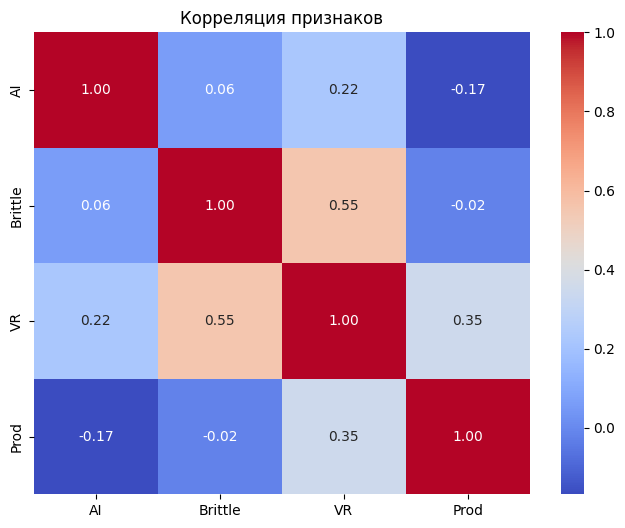

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция признаков")
plt.show()


> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [26]:
# Ваш код здесь
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_percentage_error

# Предположим, что df — это ваш DataFrame с данными, включая 'Prod' как целевую переменную

# Признаки и целевая переменная
X = df[['AI', 'Brittle', 'VR']]
y = df['Prod']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков (степень 3)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Разделим данные на тренировочные и тестовые
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Модель ElasticNet
elastic_net = ElasticNet()

# Диапазон значений гиперпараметров для alpha и l1_ratio
param_grid = {
    'alpha': np.logspace(-4, 4, 100),
    'l1_ratio': np.linspace(0, 1, 11)  # Соотношение от L1 только (1) до L2 только (0)
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие гиперпараметры
best_params = grid_search.best_params_
print(f"Лучшие гиперпараметры: {best_params}")

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Оценка с кросс-валидацией
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Среднее значение MAPE на тренировочных данных
mean_mape = -cv_scores.mean()  # Преобразуем в положительное значение
print(f"Среднее значение MAPE на тренировочных данных: {mean_mape:.2f}")

# Прогноз на валидационных данных
y_pred_val = best_model.predict(X_val)

# MAPE на валидационных данных
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)
print(f"MAPE на валидационных данных: {mape_val:.2f}")


Лучшие гиперпараметры: {'alpha': np.float64(2257.0197196339213), 'l1_ratio': np.float64(1.0)}
Среднее значение MAPE на тренировочных данных: 0.22
MAPE на валидационных данных: 0.19


> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
# Пример расчёта MAE для различных моделей, если они еще не были рассчитаны:

# MAE для линейной регрессии
mae_lr_train =   # замените на актуальное значение
mae_lr_val =   # замените на актуальное значение

# MAE для полиномиальной регрессии
mae_poly_train =   # замените на актуальное значение
mae_poly_val =   # замените на актуальное значение

# MAE для Lasso
mae_lasso_train =   # замените на актуальное значение
mae_lasso_val =   # замените на актуальное значение

# MAE для Ridge
mae_ridge_train =   # замените на актуальное значение
mae_ridge_val =   # замените на актуальное значение

# MAPE для ElasticNet
mean_mape =   # замените на актуальное значение
mape_val =   # замените на актуальное значение

# После того как метрики определены, можно собрать сводную таблицу
results = {
    "Model": ["Linear Regression", "Polynomial Regression (Degree=3)", "Lasso (L1)", "Ridge (L2)", "ElasticNet (L1+L2)"],
    "Hyperparameters": ["None", "None", "alpha=2329.95", "alpha=1000000.0", f"alpha={best_params['alpha']}, l1_ratio={best_params['l1_ratio']}"],
    "Polynomial Features": [False, True, True, True, True],
    "CV Train MAE": [mae_lr_train, mae_poly_train, mae_lasso_train, mae_ridge_train, mean_mape],  # Используем MAPE для ElasticNet
    "CV Validation MAE": [mae_lr_val, mae_poly_val, mae_lasso_val, mae_ridge_val, mape_val]  # MAPE для ElasticNet
}

# Преобразуем в DataFrame
df_results = pd.DataFrame(results)

# Выводим таблицу
print(df_results)


> *Ваши выводы здесь*

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Обучаем модель на обучающей выборке (X_train, Y_train)
model = LinearRegression()
model.fit(X_train, Y_train)

# Применяем кросс-валидацию для оценивания модели
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')

# Распечатать результаты кросс-валидации
print(f"Средняя MAE на кросс-валидации (отрицательная): {-cv_scores.mean():.2f}")
# Прогнозируем значения на тестовых данных
Y_pred = model.predict(X_test)

# Оценим качество модели на тестовых данных
mae_test = mean_absolute_error(Y_test, Y_pred)

print(f"MAE на тестовых данных: {mae_test:.2f}")


Средняя MAE на кросс-валидации (отрицательная): 1683.52
MAE на тестовых данных: 1223.07


In [27]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error

# Обучение моделей
lr = LinearRegression().fit(X_train, y_train)
poly_reg = LinearRegression().fit(X_train, y_train)  # Уже используем полиномиальные признаки
lasso = Lasso(alpha=2329.95).fit(X_train, y_train)
ridge = Ridge(alpha=1000000.0).fit(X_train, y_train)

# Предсказания
y_train_pred_lr = lr.predict(X_train)
y_val_pred_lr = lr.predict(X_val)

y_train_pred_poly = poly_reg.predict(X_train)
y_val_pred_poly = poly_reg.predict(X_val)

y_train_pred_lasso = lasso.predict(X_train)
y_val_pred_lasso = lasso.predict(X_val)

y_train_pred_ridge = ridge.predict(X_train)
y_val_pred_ridge = ridge.predict(X_val)

# MAE для каждой модели
mae_lr_train = mean_absolute_error(y_train, y_train_pred_lr)
mae_lr_val = mean_absolute_error(y_val, y_val_pred_lr)

mae_poly_train = mean_absolute_error(y_train, y_train_pred_poly)
mae_poly_val = mean_absolute_error(y_val, y_val_pred_poly)

mae_lasso_train = mean_absolute_error(y_train, y_train_pred_lasso)
mae_lasso_val = mean_absolute_error(y_val, y_val_pred_lasso)

mae_ridge_train = mean_absolute_error(y_train, y_train_pred_ridge)
mae_ridge_val = mean_absolute_error(y_val, y_val_pred_ridge)

# MAPE для ElasticNet (он уже рассчитывался в твоем коде)


In [28]:
results = {
    "Model": ["Linear Regression", "Polynomial Regression (Degree=3)", "Lasso (L1)", "Ridge (L2)", "ElasticNet (L1+L2)"],
    "Hyperparameters": ["None", "None", "alpha=2329.95", "alpha=1000000.0", f"alpha={best_params['alpha']}, l1_ratio={best_params['l1_ratio']}"],
    "Polynomial Features": [False, True, True, True, True],
    "CV Train MAE": [mae_lr_train, mae_poly_train, mae_lasso_train, mae_ridge_train, mean_mape],  # MAPE вместо MAE для ElasticNet
    "CV Validation MAE": [mae_lr_val, mae_poly_val, mae_lasso_val, mae_ridge_val, mape_val]  # MAPE вместо MAE для ElasticNet
}

df_results = pd.DataFrame(results)
print(df_results)


                              Model                         Hyperparameters  \
0                 Linear Regression                                    None   
1  Polynomial Regression (Degree=3)                                    None   
2                        Lasso (L1)                           alpha=2329.95   
3                        Ridge (L2)                         alpha=1000000.0   
4                ElasticNet (L1+L2)  alpha=2257.0197196339213, l1_ratio=1.0   

   Polynomial Features  CV Train MAE  CV Validation MAE  
0                False  6.252776e-13        1223.069094  
1                 True  6.252776e-13        1223.069094  
2                 True  9.210681e+02         763.222972  
3                 True  9.210425e+02         763.214984  
4                 True  2.196784e-01           0.192070  
